<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion14_g44_17oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica aplicda

Sesion 14-17 octubre

Yessica Abigail Santiago Hernandez 1990002

gpo 44

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [5]:
#datos
igae_deses = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

* ARIMA(p,I,q): Se usa para series sin componente estacional
* SARIMA: Se usa en series con componente estacional

In [7]:
igae_deses.head(3)

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254


In [8]:
#formato fecha
igae_deses['meses'] = pd.to_datetime(igae_deses['meses'], format ='%Y/%m') #darle formato de fecha python a la columna del tiempo


In [10]:
igae_deses.dtypes #para comprobar que si se tiene el formato fecha

meses         datetime64[ns]
IGAE_DESES           float64
dtype: object

In [11]:
#index
igae_deses = igae_deses.set_index('meses') #hacer la columna meses el index


In [12]:
igae_deses.head(3)

,IGAE_DESES
meses,
1993-01-01,56.282290
1993-02-01,57.708594
1993-03-01,57.825254


In [13]:
#frecuencia asignada
igae_deses = igae_deses.asfreq('MS')

In [15]:
igae_deses.index #comprobacion: dice datetime, el index es meses y la frecuencia es MS

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

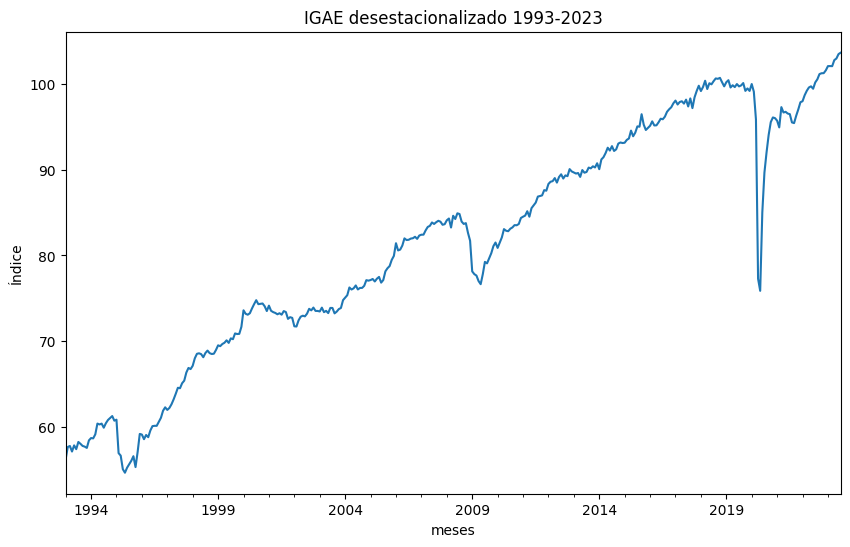

In [18]:
#graficar
igae_deses['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('Índice');

Por los resultados del grafico se observa que el IGAE se parece a una caminata aleatoria con deriva positiva y por tanto sospechamos que es un proceso no estacionario

In [19]:
#dickey-Fuller Aumentada
## Ho: No estacionaria
## Ha: Estacionario

dfa_test = adfuller(igae_deses['IGAE_DESES'])

In [20]:
dfa_test

(-1.0481779348666842,
 0.7352896929912623,
 2,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 1147.2710040898037)

In [22]:
pvalue1=dfa_test[1]
pvalue1.round(2)

0.74

Con un p-value de 0.74 no rechazamos Ho, lo cual significa que el igae es una serie no estacionaria


In [26]:
#como la serie es no estacionaria debemos aplicar primeras inferencias para hacerla estacionaria
igae_deses['igae_diff'] = igae_deses['IGAE_DESES'].diff()

In [28]:
igae_deses.head()

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929


In [31]:
##dickey fuller aumentada a las 1eras inferencias del IGAE
dfa_test1 = adfuller(igae_deses['igae_diff'].dropna())
pvalue2 = dfa_test1[1]
pvalue2.round(3)

0.0

como el p-value es igual a 0.0, rechazamos Ho y por o tanto igae_diff es un proceso estacionario

* IGAE = Integrado orden uno I(1)
* igae_diff = Integrado de orden cero I(0)


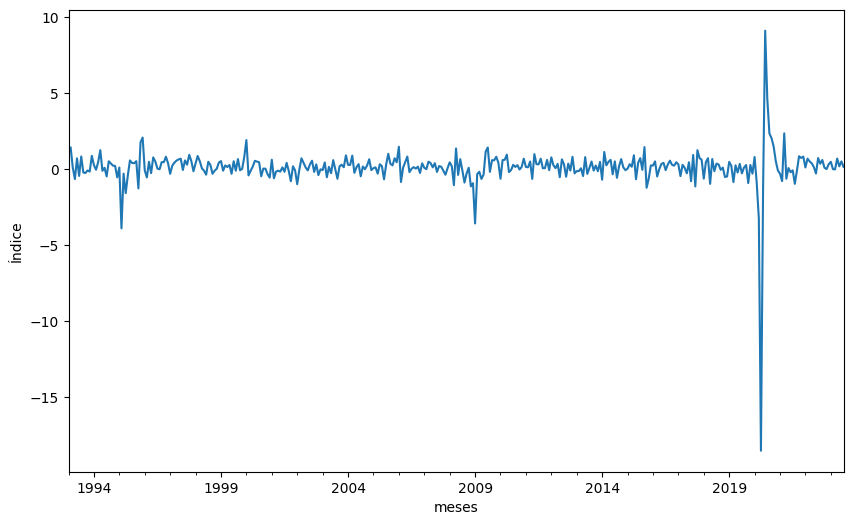

In [33]:
igae_deses['igae_diff'].plot()
plt.ylabel('Índice');

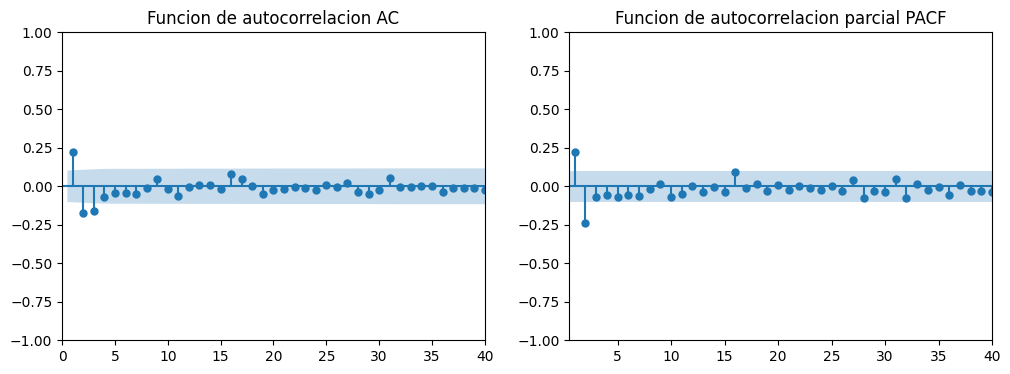

In [37]:
#igae_diff es estacionario
##¿que tipo de proceso estacionario es?
### funcion de autocorrelacion y funcion de autocorrelacion parcial
ig, ax = plt.subplots(1,2,figsize =(12,4))
## sub-grafica 1
plot_acf(igae_deses['igae_diff'].dropna(),zero= False, lags = 40, ax = ax[0], title = 'Funcion de autocorrelacion AC')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,40)

## sub-grafica 2
plot_pacf(igae_deses['igae_diff'].dropna(),zero = False, lags = 40, ax= ax[1], title = 'Funcion de autocorrelacion parcial PACF')
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0.5,40)

plt.show()

Yo sospecho igae_diff es un AR(1) = ARMA(1,0) = ARIMA(1,0,0)


In [39]:
## metodo alternativo/ vamos a estimar un ARIMA(1,0,0)
modelo_prueba = ARIMA(igae_deses['igae_diff'].dropna(), order = (1,0,0))
resultadop = modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Tue, 17 Oct 2023   AIC                           1210.530
Time:                        18:24:46   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

Este modelo nos dice que la ecuacion de igae_diff:
$$ Y_t = 0.2219 Y_{t-1} + ɛ_t $$

In [40]:
# suponemos que es un AR(2) = ARIMA(2,0,0)
modelo_prueba2 = ARIMA(igae_deses['igae_diff'].dropna(), order = (2,0,0))
resultadop2 = modelo_prueba2.fit()
print(resultadop2.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -591.689
Date:                Tue, 17 Oct 2023   AIC                           1191.379
Time:                        18:31:07   BIC                           1206.989
Sample:                    02-01-1993   HQIC                          1197.582
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.110      1.179      0.238      -0.085       0.344
ar.L1          0.2747      0.027     10.270      0.000       0.222       0.327
ar.L2         -0.2367      0.017    -14.275      0.0

ecuacion: $$ Y_t = 0.27 Y_{t-1} -0.23 Y_{t-2} + \varepsilon_t $$

In [ ]:
#vamos a estimar varios modelos y guardar el AIC BIC
ic ={}

for ar in range(7):
  for ma in range(7):
    print(f'AR:{ar},MA:{ma}')
    modelo = ARIMA(igae_deses['igae_diff'].dropna(),order=(ar,0,ma))
    resultado = modelo.fit()
    ic[(ar,ma)] = [resultado.aic,resultado.bic]

ic = pd.DataFrame(ic, index=['AIC','BIC']).T
ic.index = ic.index.set_names(['AR','MA'])

In [47]:
ic.sort_values('AIC',ascending = True).head(1)


,,AIC,BIC
AR,MA,,
3,1,1183.372558,1206.788358


* igae_diff es un ARMA(3,1) = ARIMA(3,0,1)
* Igae ARIMA(3,1,1)